# 说明

这是在运行代码中一些使用单行运行的代码的合集

## 2.1

In [1]:
from keras.datasets import mnist
print(help(mnist))

Using TensorFlow backend.


Help on module keras.datasets.mnist in keras.datasets:

NAME
    keras.datasets.mnist - MNIST handwritten digits dataset.

FUNCTIONS
    load_data(path='mnist.npz')
        Loads the MNIST dataset.
        
        # Arguments
            path: path where to cache the dataset locally
                (relative to ~/.keras/datasets).
        
        # Returns
            Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    d:\anaconda3\lib\site-packages\keras\datasets\mnist.py


None


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


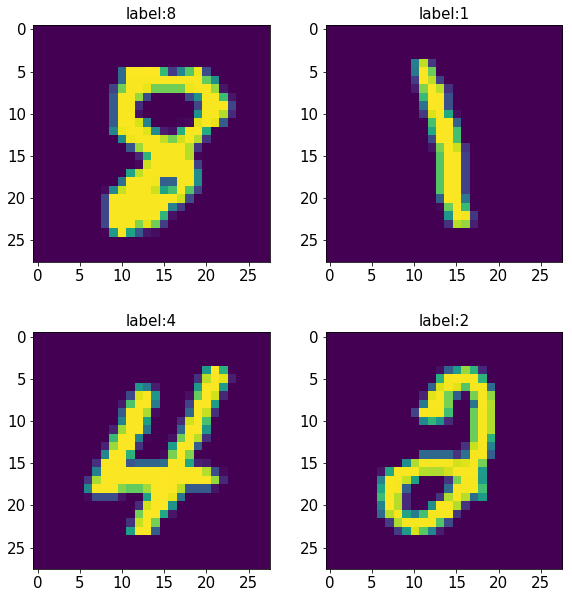

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# 载入数据集，并且输出维度大小
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 随机提取四副图片
index = np.random.randint(0, 60000, 4)

# 绘制四副图片
plt.figure(figsize=(10, 10))                         # 设置图片画布大小
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)      # 设置子图间隔大小
for i in range(4):
    plt.subplot(2,2,i+1)
    title = 'label:'+str(train_labels[index[i]])     # 中间的+号表示字符串拼接，真是神奇啊
    plt.title(title, fontsize = 15)                  # 设置图片标题以及字体大小
    plt.xticks(fontsize = 15)                        # 设置x刻度大小
    plt.yticks(fontsize = 15)                        # 设置y刻度大小
    plt.imshow(train_images[index[i],:,:]) 
plt.show()

In [45]:
# 2-1-Mnist.py
from keras.datasets import mnist       
from keras.utils import to_categorical 
from keras import models			  
from keras import layers             

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
 				loss='categorical_crossentropy',
 				metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images  = test_images.reshape((10000, 28 * 28))
test_images  = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.2579 - acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1038 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0695 - acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0501 - acc: 0.9855
Epoch 5/5
10000/10000 [==============================] - 19s 2ms/step
test_acc: 0.9774


In [42]:
print(help(to_categorical))

Help on function to_categorical in module keras.utils.np_utils:

to_categorical(y, num_classes=None, dtype='float32')
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with categorical_crossentropy.
    
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input, as a string
            (`float32`, `float64`, `int32`...)
    
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.

None


In [45]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [46]:
train_labels = to_categorical(train_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [47]:
train_labels.shape

(60000, 10)

In [ ]:
# 载入必须的库
from keras.datasets import mnist       # 这是数据集
from keras.utils import to_categorical # 这是用于分类的工具
from keras import models               # 模型
from keras import layers               # 层
import matplotlib.pyplot as plt        # 绘图工具

# 提取原始数据，以下是固定的形式，由mnist数据集决定
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 数据预处理
train_images = train_images.reshape((60000, 28 * 28)) # 改为二维数组
train_images = train_images.astype('float32') / 255   # 归一化
test_images  = test_images.reshape((10000, 28 * 28))  # 改为二维数组
test_images  = test_images.astype('float32') / 255    # 归一化

# 将类向量（整数）转换为二进制类矩阵
train_labels = to_categorical(train_labels)  # 分类编码
test_labels  = to_categorical(test_labels)   # 分类编码

# 留出验证集（这里是新增加的内容）
x_val 			= train_images[:10000] # 验证集：前10000个
partial_x_train = train_images[10000:] # 训练集：10000至60000个
y_val 			= train_labels[:10000] # 验证集：前10000个
partial_y_train = train_labels[10000:] # 训练集：10000至60000个

# 建立网络模型
network = models.Sequential()  		   # 顺序模型
# 第一层：全连接层，512路relu激活函数
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))   
# 第二层：全连接层，10路softmax激活函数
network.add(layers.Dense(10, activation = 'softmax'))							

# 配置训练模型
network.compile(optimizer = 'rmsprop',                  # 优化器，rmsprop
 				loss      = 'categorical_crossentropy', # 代价函数, 交叉熵
 				metrics   =['accuracy'])                # 评估指标，精度

# 进行网络训练
history = network.fit(partial_x_train, partial_y_train, epochs=5, batch_size=128, 						  validation_data=(x_val, y_val))   # 5轮次，每一批128个

# 查看测试集结果
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

# 作图
history_dict    = history.history
loss_values     = history_dict['loss']
val_loss_values = history_dict['val_loss 
epochs = range(1, len(loss_values) + 1) # 初始化迭代轮次向量
plt.figure(1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_dict['acc'] 
val_acc = history_dict['val_acc']
plt.figure(2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
import numpy as np
np.array([1, 2, 3]).dot(np.array([2, 3, 4]))

20

In [56]:
28*28

784

In [57]:
print('sdaf'+'dsafd')

sdafdsafd


In [61]:
print(''.join(['asdf', 'asdf']))

asdfasdf


In [67]:
from keras.datasets import imdb
print(help(imdb))

Help on module keras.datasets.imdb in keras.datasets:

NAME
    keras.datasets.imdb - IMDB sentiment classification dataset.

FUNCTIONS
    get_word_index(path='imdb_word_index.json')
        Retrieves the dictionary mapping words to word indices.
        
        # Arguments
            path: where to cache the data (relative to `~/.keras/dataset`).
        
        # Returns
            The word index dictionary.
    
    load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
        Loads the IMDB dataset.
        
        # Arguments
            path: where to cache the data (relative to `~/.keras/dataset`).
            num_words: max number of words to include. Words are ranked
                by how often they occur (in the training set) and only
                the most frequent words are kept
            skip_top: skip the top N most frequently occurring words
                (which may not be informative)

In [68]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
print(train_data.shape)
print(train_labels.shape)

17465344/17464789 [==============================] - 99s 6us/step
(25000,)
(25000,)


In [77]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [78]:
max([max(i) for i in train_data ])

9999

In [93]:
# 下载单词字典对应的数据集（这是一个字典）
word_index = imdb.get_word_index().
# 将原始字典的key和value进行颠倒，即将索引值映射为单词
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 对训练集中的第一条评论，按照索引将其转换为单词，并且使用空格来拼接起来，注意后移了3位
# 注意事实上，i并不会从1开始索引，因为i是实际化中频率出现的单词索引，索引不可能小于3
decode_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
print(decode_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [105]:
print(len(word_index))
print(len(reverse_word_index))
print(reverse_word_index.get(1))

88584
88584
the


In [106]:
train_data[0:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [126]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results

    
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

print(train_data[0])
print(x_train[0])

# 标签数据向量化
x_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

a = np.zeros((1, 10))
print(a)
a[0, [1,2,6,2,8,1]] = 1.
print(a)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[0. 1. 1. ... 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 530us/step - loss: 0.5072 - acc: 0.7837 - val_loss: 0.3789 - val_acc: 0.8694
Epoch 2/20
15000/15000 [==============================] - 6s 414us/step - loss: 0.2999 - acc: 0.9050 - val_loss: 0.3001 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 7s 467us/step - loss: 0.2177 - acc: 0.9282 - val_loss: 0.3085 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 7s 471us/step - loss: 0.1749 - acc: 0.9440 - val_loss: 0.2840 - val_acc: 0.8842
Epoch 5/20
15000/15000 [==============================] - 7s 435us/step - loss: 0.1425 - acc: 0.9543 - val_loss: 0.2852 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 7s 443us/step - loss: 0.1151 - acc: 0.9651 - val_loss: 0.3145 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 6s 428us/step - loss: 0.0980 - acc: 0.9709 - val_loss: 0.3129 - 

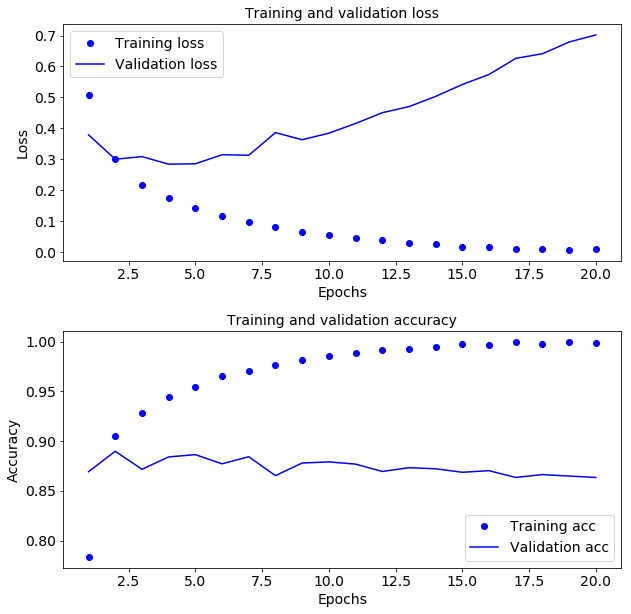

In [153]:
# 3.3
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results # 这个地方，刚才缩进不正确，导致结果差的太大了

    
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

x_val           = x_train[:10000]
partial_x_train = x_train[10000:]
y_val           = y_train[:10000]
partial_y_train = y_train[10000:]

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1 , activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss      = 'binary_crossentropy',
              metrics   = ['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

# 结果绘图
history_dict    = history.history
loss_values     = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc             = history_dict['acc']
val_acc         = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 10))                         # 设置图片画布大小
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)      # 设置子图间隔大小
plt.subplot(2, 1, 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss', fontsize = 14)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
plt.xticks(fontsize = 14)                        # 设置x刻度大小
plt.yticks(fontsize = 14)                        # 设置y刻度大小
plt.legend(fontsize = 14)

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', fontsize = 14)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.xticks(fontsize = 14)                        # 设置x刻度大小
plt.yticks(fontsize = 14)                        # 设置y刻度大小
plt.legend(fontsize = 14)

plt.show()

In [156]:
# 只训练4代，以防止过拟合
model2 = models.Sequential()
model2.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model2.add(layers.Dense(16, activation = 'relu'))
model2.add(layers.Dense(1 , activation = 'sigmoid'))

model2.compile(optimizer = 'rmsprop',
               loss      = 'binary_crossentropy',
               metrics   = ['accuracy'])

model2.fit(x_train, y_train, epochs = 4, batch_size = 512)

results = model2.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 9s 371us/step - loss: 0.4460 - acc: 0.8243
Epoch 2/4
25000/25000 [==============================] - 9s 357us/step - loss: 0.2555 - acc: 0.9103
Epoch 3/4
25000/25000 [==============================] - 8s 338us/step - loss: 0.1968 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 21s 856us/step


### 以下内容是3.5

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 87aedbeb0cb229e378797a632c1997b6 so we will re-download the data.
2113536/2110848 [==============================] - 119s 56us/step


In [4]:
print(train_data.shape)
print(test_data.shape)
print(train_data[0])

(8982,)
(2246,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [8]:
# 解码为单词
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])
print(decoded_newswire)
print(train_labels[0])

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 503us/step - loss: 2.5310 - acc: 0.4956 - val_loss: 1.7238 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 3s 392us/step - loss: 1.4492 - acc: 0.6869 - val_loss: 1.3485 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 4s 452us/step - loss: 1.0994 - acc: 0.7640 - val_loss: 1.1731 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 3s 431us/step - loss: 0.8728 - acc: 0.8146 - val_loss: 1.0813 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 3s 436us/step - loss: 0.7060 - acc: 0.8473 - val_loss: 0.9863 - val_acc: 0.7780
Epoch 6/20
7982/7982 [==============================] - 3s 397us/step - loss: 0.5696 - acc: 0.8792 - val_loss: 0.9423 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 3s 424us/step - loss: 0.4625 - acc: 0.9032 - val_loss: 0.9117 - val_acc: 0.7980


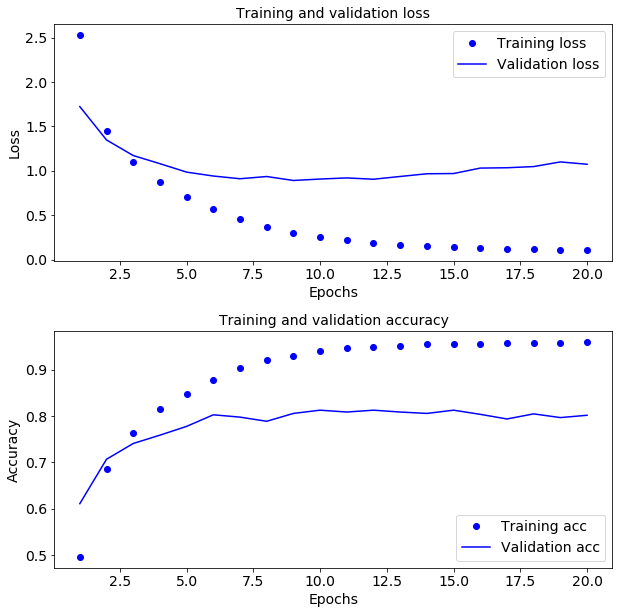

In [22]:
# 3.5 以下是完整代码
from keras.datasets import reuters
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np


def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


# 提取数据
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

# 数据向量化
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

# 标签向量化
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

# 留出验证集
x_val         = x_train[:1000]
partial_x_val = x_train[1000:]
y_val         = one_hot_train_labels[:1000]
partial_y_val = one_hot_train_labels[1000:]

# 构建模型
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

# 编译模型
model.compile(optimizer = 'rmsprop',
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

# 训练模型
history = model.fit(partial_x_val,
                    partial_y_val,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))


# 绘图
loss     = history.history['loss']
val_loss = history.history['val_loss']
acc      = history.history['acc']
val_acc  = history.history['val_acc']
epochs = range(1, len(loss) + 1)

plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)
plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss', fontsize = 14)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
plt.xticks(fontsize = 14)                        # 设置x刻度大小
plt.yticks(fontsize = 14)                        # 设置y刻度大小
plt.legend(fontsize = 14)

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', fontsize = 14)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.xticks(fontsize = 14)                        # 设置x刻度大小
plt.yticks(fontsize = 14)                        # 设置y刻度大小
plt.legend(fontsize = 14)

plt.show()

### 以下是3.6

In [25]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 2s 38us/step


In [32]:
print(train_data.shape)
print(train_targets.shape)
print(train_targets[0])
print(test_data.shape)
print(test_targets.shape)
print(test_targets[0])

(404, 13)
(404,)
15.2
(102, 13)
(102,)
7.2


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
1


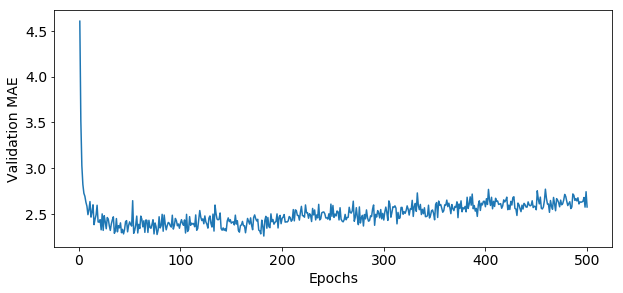

In [60]:
# 以下是正式的代码
from keras.datasets import boston_housing
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np


# 将构建模型封装为一个函数
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop',
                  loss      = 'mse',      # 注意损失函数为，均方误差
                  metrics   = ['mae'])    # 注意指标为平均绝对误差
    return model


# 进行曲线的平滑
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:  # 如果非空
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:                # 如果是空，用来处理第一个
            smoothed_points.append(point)
    return smoothed_points   # 注意最终的返回值的缩进


# 读取数据
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# 数据标准化
mean        = train_data.mean(axis = 0) # 这是按列的意思，axis = 1 是行
std         = train_data.std(axis = 0)
train_data -= mean    # 可以发现训练集合测试集使用的标准化参数，都来自训练集
train_data /= std
test_data  -= mean
test_data  /= std

# 参数初始化
k                 = 4                     # 这里选择的是4折
num_val_samples   = len(train_data) // k  # 向下取整（也就是说会舍弃一些值，除非刚好整除）
num_epochs        = 500                   # 训练迭代轮次
all_mae_histories = []                    # 存储结果的数组

# 开始k折验证
for i in range(k):
    print('processing fold #', i)
    
    # 验证集
    val_data    = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 训练集
    partial_train_data = np.concatenate(          # 需要进行数组拼接，注意是按列拼接
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis = 0)

    # 建立模型并开始训练
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs,
                        batch_size = 1,
                        verbose = 0)

    # 保存结果
    mae_history = history.history['val_mean_absolute_error'] # 注意 mae_history 的大小是100*1
    all_mae_histories.append(mae_history)                    # 结果是4*1，但每个元素都是100*1

# 处理结果并画图
# 应该体会这种双for的操作
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
smooth_mae_history  = smooth_curve(average_mae_history[10:]) # 除掉前10个的平滑结果
epochs = range(1, len(average_mae_history) + 1)

plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)
plt.subplot(2, 1, 1)
plt.plot(epochs, average_mae_history)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Validation MAE', fontsize = 14)
plt.xticks(fontsize = 14)                        # 设置x刻度大小
plt.yticks(fontsize = 14)                        # 设置y刻度大小

plt.subplot(2, 1, 2)
plt.plot(epochs[10:], smooth_mae_history)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Validation MAE', fontsize = 14)
plt.xticks(fontsize = 14)                        # 设置x刻度大小
plt.yticks(fontsize = 14)                        # 设置y刻度大小

plt.show()

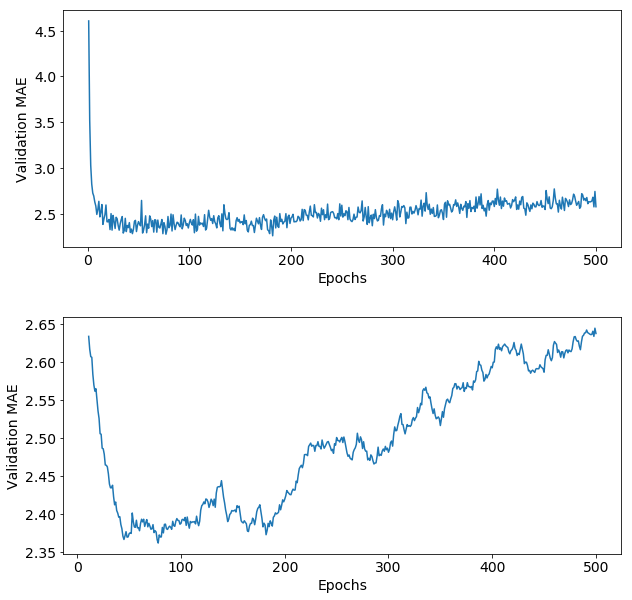

In [67]:
# 处理结果并画图
# 应该体会这种双for的操作
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
smooth_mae_history  = smooth_curve(average_mae_history[10:]) # 除掉前10个的平滑结果
epochs = range(1, len(average_mae_history) + 1)

plt.figure(figsize = (10, 10))
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)
plt.subplot(2, 1, 1)
plt.plot(epochs, average_mae_history)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Validation MAE', fontsize = 14)
plt.xticks(fontsize = 14)                        # 设置x刻度大小
plt.yticks(fontsize = 14)                        # 设置y刻度大小

plt.subplot(2, 1, 2)
plt.plot(epochs[10:], smooth_mae_history)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Validation MAE', fontsize = 14)
plt.xticks(fontsize = 14)                        # 设置x刻度大小
plt.yticks(fontsize = 14)                        # 设置y刻度大小

plt.show()

1